<a href="https://colab.research.google.com/github/ashamril/optimization/blob/master/Undersampling_with_PSO_RUS_and_Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison between Imbalanced Dataset vs Undersampling/balancing using **Particle Swarm Optimization (PSO)** vs **Random Undersampling (RUS)**
# Classification using **Supervised Machine Learning**: ANN, SVM, XGBoost, RF and LR [MLPClassifier(), SVC(), XGBClassifier(), RandomForestClassifier() and LogisticRegression()]

In [307]:
from datetime import datetime 
from pytz import timezone  
from random import randint
from scipy import spatial
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import f1_score, average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import scipy.spatial
import seaborn as sns
import time
import warnings 

In [308]:
# CATEGORICAL = "NO"
# dataset_set = "abalone19"
# program_name = "PSO"
# !wget -O dataset.csv https://raw.githubusercontent.com/ashamril/CSV/master/abalone19.csv

# malaysia = timezone('Asia/Kuala_Lumpur')
# mytime = datetime.now(malaysia)
# first_start_time = datetime.now() 
# start_time = datetime.now() 
# file_path = "/content/dataset.csv"                     
# df = pd.read_csv(file_path, header=0)
# print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

# df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight','Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Class']
# df['New_Sex'] = df['Sex'].map(dict(zip(['M','F','I'],[0,1,2])))
# df = df.drop('Sex', axis = 1)
# df['New_Class'] = df['Class'].map(dict(zip([' negative',' positive'],[0,1])))
# df = df.drop('Class', axis = 1)
# df

In [309]:
# CATEGORICAL = "NO"
# dataset_set = "pima"
# program_name = "PSO"
# !wget -O dataset.csv https://raw.githubusercontent.com/ashamril/CSV/master/pima.csv

# malaysia = timezone('Asia/Kuala_Lumpur')
# mytime = datetime.now(malaysia)
# first_start_time = datetime.now() 
# start_time = datetime.now() 
# file_path = "/content/dataset.csv"                     
# df = pd.read_csv(file_path, header=0)
# print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

# df['New_Class'] = df['Class'].map(dict(zip(['negative','positive'],[0,1])))
# df = df.drop('Class', axis = 1)
# df

In [310]:
CATEGORICAL = "YES"
dataset_set = "BankMarketing"
program_name = "PSO"
#!wget -O dataset.csv https://raw.githubusercontent.com/ashamril/CSV/master/bank.csv
!wget -O dataset.csv https://raw.githubusercontent.com/ashamril/CSV/master/bank-full.csv

malaysia = timezone('Asia/Kuala_Lumpur')
mytime = datetime.now(malaysia)
first_start_time = datetime.now() 
start_time = datetime.now() 
file_path = "/content/dataset.csv"                     
df = pd.read_csv(file_path, sep=';', header=0)
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

df['New_Class'] = df['y'].map(dict(zip(['no','yes'],[0,1])))
df = df.drop('y', axis = 1)
df

--2020-08-02 18:18:44--  https://raw.githubusercontent.com/ashamril/CSV/master/bank-full.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4610348 (4.4M) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]   4.40M  13.1MB/s    in 0.3s    

2020-08-02 18:18:44 (13.1 MB/s) - ‘dataset.csv’ saved [4610348/4610348]

Time elapsed (hh:mm:ss.ms) 0:00:00.099377


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,New_Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


   Counts Percentage
1    5289      11.7%
0   39922      88.3%



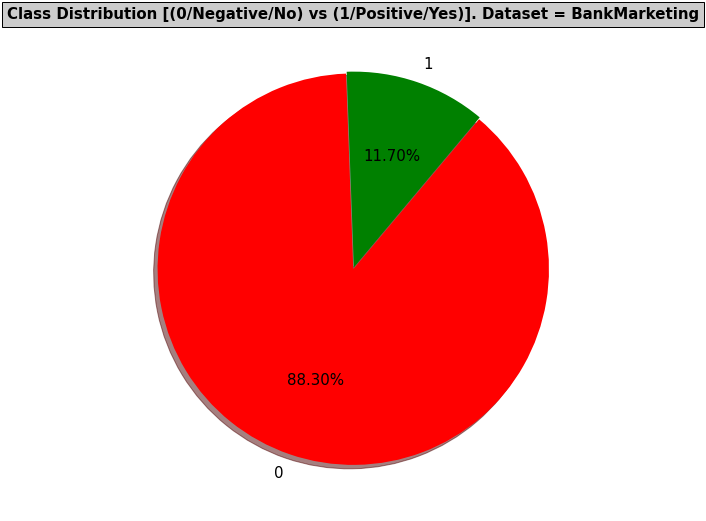

In [311]:
  plt.figure(figsize=(20,9))
  s = df.New_Class
  counts = s.value_counts().sort_index()
  percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
  df2 = pd.DataFrame({'Counts': counts, 'Percentage': percent100}).sort_index(ascending=False)
  print(df2)
  print("")
  colors=['green', 'red']
  explode = (0.01, 0)
  df2.Counts.plot(kind='pie', explode=explode, colors=colors, autopct='%1.2f%%', shadow=True, startangle=50, fontsize=15)
  plt.title("Class Distribution [(0/Negative/No) vs (1/Positive/Yes)]. Dataset = {}".format(dataset_set), fontweight='bold', fontsize=15, bbox={'facecolor':'0.8', 'pad':5})
  plt.ylabel('')
  plt.show()

In [312]:
# Convert categorical data into numerical

if (CATEGORICAL == "YES"):
  from sklearn.preprocessing import LabelEncoder
  df = df.apply(LabelEncoder().fit_transform)
  
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,New_Class
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0


# Imbalanced Dataset

In [313]:
# Separating the dependent and independent variables 

test_size = 0.2

X = df.drop('New_Class', axis = 1) 
y = df['New_Class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

Imbalanced :
X_train:
Negative 88.28 % of the dataset: 31929
Positive 11.72 % of the dataset: 4239

X_test:
Negative 88.39 % of the dataset: 7993
Positive 11.61 % of the dataset: 1050



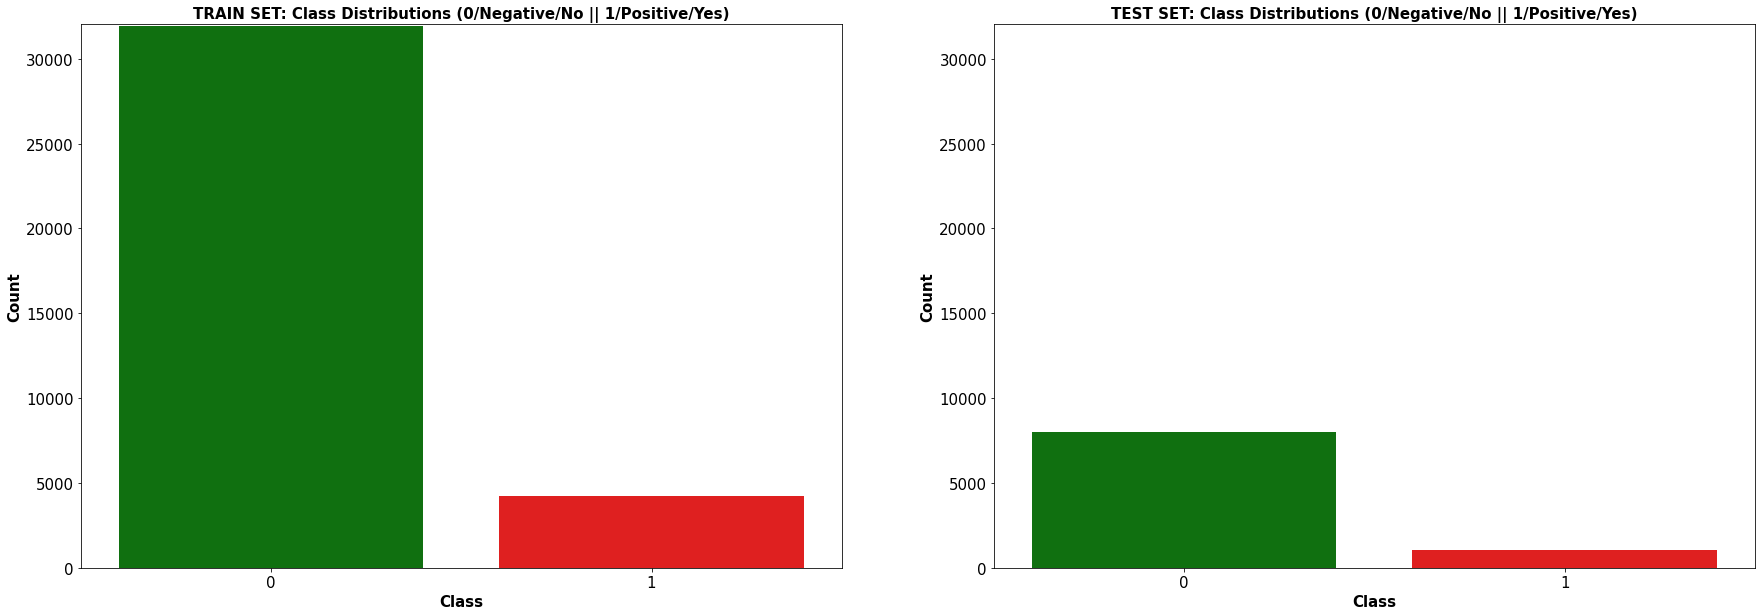

In [314]:
# Plotting the sets

plot_height = (len(df[df.New_Class == 0]) * 0.8) + 100

fig, ax = plt.subplots(1, 2, figsize=(30, 10))
plt.subplot(1, 2, 1)
colors = ["green", "red"]
df_train = pd.DataFrame(y_train.value_counts())
ax = sns.countplot(y_train, data=df_train, palette=colors)
ax.set_ylim(0, plot_height)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.xlabel('Class', fontweight='bold', fontsize=15)
plt.ylabel('Count', fontweight='bold', fontsize=15)
plt.title('TRAIN SET: Class Distributions (0/Negative/No || 1/Positive/Yes)', fontweight='bold', fontsize=15)

plt.subplot(1, 2, 2)
colors = ["green", "red"]
df_train = pd.DataFrame(y_test.value_counts())
ax = sns.countplot(y_test, data=df_train, palette=colors)
ax.set_ylim(0, plot_height)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.xlabel('Class', fontweight='bold', fontsize=15)
plt.ylabel('Count', fontweight='bold', fontsize=15)
plt.title('TEST SET: Class Distributions (0/Negative/No || 1/Positive/Yes)', fontweight='bold', fontsize=15)

print("Imbalanced :")
print("X_train:")
print('Negative', round(y_train.value_counts()[0]/len(y_train) * 100,2), '% of the dataset:', y_train.value_counts()[0])
print('Positive', round(y_train.value_counts()[1]/len(y_train) * 100,2), '% of the dataset:', y_train.value_counts()[1])
print("")
print("X_test:")
print('Negative', round(y_test.value_counts()[0]/len(y_test) * 100,2), '% of the dataset:', y_test.value_counts()[0])
print('Positive', round(y_test.value_counts()[1]/len(y_test) * 100,2), '% of the dataset:', y_test.value_counts()[1])
print("")

plt.show()

In [315]:
# Classification with Imbalanced Dataset

classifiers = [MLPClassifier(), SVC(probability=True), XGBClassifier(), RandomForestClassifier(), LogisticRegression(max_iter=5000)]
imbalanced_result_table_test = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
imbalanced_result_table_test_f1 = pd.DataFrame(columns=['Classifiers', 'Accuracy','Sensitivity', 'Specificity', 'Precision', 'F1Score', 'AUC', 'AveragePrecisionRecall'])

for cls in classifiers:
    model = cls.fit(X_train, y_train)

    # TEST set
    yproba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    imbalanced_result_table_test = imbalanced_result_table_test.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
    print("=====================================================================")
    print("Classifier = ", cls)
    print("TEST SET")
    y_pred = cls.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred, pos_label=1, average='macro')
    average_precision = average_precision_score(y_test, y_pred, average='weighted')
    ##print("Accuracy : ", accuracy)
    ##print("F1 Score : ", f1score)
    ##print("AUC : ", auc)
    ##print("Average Precision Recall: ", average_precision)
    ##print("")
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    
    
    precision, recall, fscore, support = score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    ##print('Accuracy: {}'.format(np.round(accuracy * 100, 2)))
    ##print('Sensitivity: {}'.format(np.round(recall * 100, 2)))
    ##print('Specificity: {}'.format(np.round(specificity * 100, 2)))
    ##print('Precision: {}'.format(np.round(precision * 100, 2)))
    ##print('F1Score: {}'.format(np.round(fscore * 100, 2)))
    recall = np.round(recall, 4)
    precision = np.round(precision, 4)
    fscore = np.round(fscore, 4)
    imbalanced_result_table_test_f1 = imbalanced_result_table_test_f1.append({'Classifiers':str(cls)[0:3],
                                        'Accuracy':accuracy, 
                                        'Sensitivity':recall, 
                                        'Specificity':specificity, 
                                        'Precision':precision, 
                                        'F1Score':fscore,
                                        'AUC':auc, 
                                        'AveragePrecisionRecall':average_precision}, ignore_index=True)
    
# Set name of the classifiers as index labels
pd.options.display.max_columns = None
pd.set_option('display.expand_frame_repr', False)
imbalanced_result_table_test.set_index('classifiers', inplace=True)
#print(result_table_test)
#print(result_table_test_f1)

Classifier =  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
TEST SET
[[7812  181]
 [ 789  261]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7993
           1       0.59      0.25      0.35      1050

    accuracy                           0.89      9043
   macro avg       0.75      0.61      0.65      9043
weighted avg       0.87      0.89      0.87      9043

Classifier =  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    deci

In [316]:
# Results performance bar plot (Imbalanced Dataset)

color = ('#FF4136', '#2ECC40', '#FF851B', '#0074D9')
#FF851B orange, #FF4136 red, #0074D9, blue, #2ECC40 green)

# Function plotting the results performance
def plot_result(result_table, result_set, dataset):
  result_table = result_table.set_index('Classifiers')
  result_table = result_table.round(4)
  print('Imbalanced', result_set, 'set result:\n', result_table)
  #ax = result_table.plot.bar(color=color, figsize=(20, 9))
  #plt.xticks(rotation=0)
  #plt.ylabel("Performance", fontsize=15)
  #plt.xlabel("Classifiers", fontsize=15)
  #plt.ylim(0, 1.03)
  #plt.grid(True)
  #plt.legend(loc=2)
  #plt.title('{} Dataset - {} Set ({}) performance'.format(dataset, result_set, dataset_set), fontweight='bold', fontsize=15)
  
  i = 0
  label = np.round(result_table.Accuracy.values, 2)
  for p in ax.patches:
      ax.annotate(str(round(p.get_height(),2 )), (p.get_x() * 1.005, p.get_height() * 1.005), fontweight='bold', fontsize=12)
      i = i+1

  plt.show()            
  print("")

plot_result(imbalanced_result_table_test_f1, "Test", "Imbalanced")

Imbalanced Test set result:
              Accuracy       Sensitivity  Specificity         Precision           F1Score     AUC  AveragePrecisionRecall
Classifiers                                                                                                             
MLP            0.8927  [0.9774, 0.2486]       0.9774  [0.9083, 0.5905]  [0.9415, 0.3499]  0.8571                  0.2340
SVC            0.8857  [0.9954, 0.0505]       0.9954  [0.8886, 0.5889]    [0.939, 0.093]  0.7029                  0.1400
XGB            0.9035  [0.9746, 0.3619]       0.9746  [0.9208, 0.6518]  [0.9469, 0.4654]  0.9216                  0.3100
Ran            0.9058  [0.9685, 0.4286]       0.9685   [0.9281, 0.641]  [0.9478, 0.5137]  0.9270                  0.3411
Log            0.8910  [0.9779, 0.2295]       0.9779  [0.9062, 0.5766]  [0.9407, 0.3283]  0.8748                  0.2218



In [317]:
# # Plotting ROC/AUC

# # Function plotting AUC
# def plot_roc(result_table, result_set, dataset):
#   fig1 = plt.figure(1, figsize=(16,8))
#   for i in result_table.index:
#     plt.plot(result_table.loc[i]['fpr'], 
#              result_table.loc[i]['tpr'], 
#              label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
#   plt.plot([0,1], [0,1], color='orange', linestyle='--')
#   plt.xticks(np.arange(0.0, 1.1, step=0.1))
#   plt.xlabel("False Positive Rate", fontsize=15)
#   plt.yticks(np.arange(0.0, 1.1, step=0.1))
#   plt.ylabel("True Positive Rate", fontsize=15)
#   plt.title('{} Dataset - {} Set: ROC Chart'.format(dataset, result_set), fontweight='bold', fontsize=15)
#   plt.legend(prop={'size':13}, loc='lower right')

#   plt.show()
#   #fig.savefig('multiple_roc_curve.png')

# plot_roc(imbalanced_result_table_test, "Test", "Imbalanced")

# PSO Undersampling

In [318]:
# PSO undersampling using MIN/MAX distance
GBEST = "MAX"     # MIN or MAX
DROP = "SINGLE"   # SINGLE or DOUBLE

# Create 2 separate df for FLAG = 0 and 1
df_train = df.copy()

df_scaled_flag0 = df_train[df_train.New_Class == 0]
df_scaled_flag1 = df_train[df_train.New_Class == 1]

# Count total of FLAG 0 and 1
cnt_flag0 = df_train[df_train.New_Class == 0].count()[0]
cnt_flag1 = df_train[df_train.New_Class == 1].count()[0]

start_time = datetime.now() 
# PSO variables
max_particles_position = cnt_flag0
swarm_size = 10 # number of particles
row = 0
if (DROP == "DOUBLE"):
  n_rows = (cnt_flag0 - cnt_flag1) / 2
else:
  n_rows = cnt_flag0 - cnt_flag1
iteration = 0
n_iterations = 3
euc_distance = 0
fitness_candidate = 0
target = 1
target_error = 1e-6

# Variables to calculate the velocity
W = 0.5
c1 = 0.5
c2 = 0.9

df_scaled_flag0_gbest_final = pd.DataFrame([])

mytime = datetime.now(malaysia)
print(mytime)
print("Rows: ", n_rows, " ", "Max Particle Position/Flag0: ", max_particles_position, " ", "Flag1: ", cnt_flag1, " ", "No of Particles: ", swarm_size, " ", "No of Iteration: ", n_iterations)

while row < n_rows:
  start_time2 = datetime.now() 
  ###print("Row: ", row, " ", "Max Particle Position: ", max_particles_position, " ", "No of Particles: ", swarm_size, " ", "No of Iteration: ", n_iterations) 

# Define the fitness function. Calculate the distance between 2 rows using Euclidean Distance
  def fitness_function(position):
    distance = scipy.spatial.distance.cdist(df_scaled_flag0.iloc[[position[0]]], df_scaled_flag0.iloc[[position[1]]], metric='euclidean')
    #distance = scipy.spatial.distance.cdist(df_scaled_flag0.iloc[[position[0]]], df_scaled_flag0.iloc[[position[1]]], metric='minkowski')
    #distance = scipy.spatial.distance.cdist(df_scaled_flag0.iloc[[position[0]]], df_scaled_flag0.iloc[[position[1]]], metric='jaccard')
    distance = np.round(distance, 2)
    return(distance[0])

# Set velocity initial value 
  velocity_vector = ([np.array([0, 0]) for _ in range(swarm_size)])

# Generate number ranging between 0 to max_particles_position for 2 dimensions of an array
  particle_position_vector = np.random.randint(max_particles_position, size=(swarm_size, 2))

# Set initial particle position, initial pbest position and value, initial gbest and value
  pbest_position = particle_position_vector
  if (GBEST == "MIN"):
    pbest_fitness_value = np.array([float('inf') for _ in range(swarm_size)])   # MIN
    gbest_fitness_value = float('inf')                                          # MIN
  else:
    pbest_fitness_value = np.array([float() for _ in range(swarm_size)])        # MAX
    gbest_fitness_value = float()                                               # MAX

  gbest_position = np.array([float('inf'), float('inf')])
  best_iteration = np.array(float('inf'))
  pbest_final = np.array([])
  gbest_final = np.array([])

  iteration = 0
  while iteration < n_iterations:
    #print("Iteration ", iteration) 

    for i in range(swarm_size):
        fitness_candidate = fitness_function(particle_position_vector[i])
        #print(fitness_candidate, ' ', particle_position_vector[i], ' ', "iteration = ", iteration)
        
        if (fitness_candidate == 0.):
            #print("Fitness value equal", fitness_candidate, ' ', "Iteration = ", iteration)
            fitness_candidate = pbest_fitness_value[i]
        
        if (GBEST == "MIN"):
          if (pbest_fitness_value[i] > fitness_candidate):                      # MIN
            pbest_fitness_value[i] = fitness_candidate
            pbest_position[i] = particle_position_vector[i]
            pbest_result = np.array((pbest_position[i]))
            pbest_final = np.append(pbest_final, pbest_result)
            #print("Pbest =", pbest_fitness_value[i], ' ', "Pbest Position =", pbest_position[i], ' ', "Iterarion No =", iteration)

          if (gbest_fitness_value > fitness_candidate):                         # MIN
            gbest_fitness_value = fitness_candidate
            gbest_position = particle_position_vector[i]
            best_iteration = iteration
            gbest_result = np.array((gbest_position))
            gbest_final = np.append(gbest_final, gbest_result)
            #print("Gbest =", gbest_fitness_value, ' ', "Gbest Position =", gbest_position, ' ', "Iteration No =", iteration)
        else:
            if (pbest_fitness_value[i] < fitness_candidate):                    # MAX
              pbest_fitness_value[i] = fitness_candidate
              pbest_position[i] = particle_position_vector[i]
              pbest_result = np.array((pbest_position[i]))
              pbest_final = np.append(pbest_final, pbest_result)
              #print("Pbest =", pbest_fitness_value[i], ' ', "Pbest Position =", pbest_position[i], ' ', "Iterarion No =", iteration)

            if (gbest_fitness_value < fitness_candidate):                       # MAX
              gbest_fitness_value = fitness_candidate
              gbest_position = particle_position_vector[i]
              best_iteration = iteration
              gbest_result = np.array((gbest_position))
              gbest_final = np.append(gbest_final, gbest_result)
              #print("Gbest =", gbest_fitness_value, ' ', "Gbest Position =", gbest_position, ' ', "Iteration No =", iteration)
           
    if (abs(gbest_fitness_value - target) < target_error):
        break
        
    for i in range(swarm_size):
        new_velocity = (W * velocity_vector[i]) + (c1 * random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2 *random.random()) * (gbest_position - particle_position_vector[i])
        new_position = new_velocity + particle_position_vector[i]
        new_position = abs(np.round(new_position, 0))
        particle_position_vector[i] = new_position

    iteration = iteration + 1

  ###print("============================================================================================")
  print("The best position is", gbest_position,". The gbest value is", gbest_fitness_value, "in iteration number", best_iteration)       
  ###print("============================================================================================")
  #print("Gbest position", gbest_final)
  #print("=======================================================================================")
  #print("Pbest position", pbest_final)

  if (DROP == "DOUBLE"):
    df_scaled_flag0 = df_scaled_flag0.drop(df_scaled_flag0.index[gbest_position[1]])
    df_scaled_flag0 = df_scaled_flag0.drop(df_scaled_flag0.index[gbest_position[0]])
    max_particles_position = cnt_flag0 - 2  
  else:
    # Drop randomly 0 or 1
    r = random.randint(0, 1)
    df_scaled_flag0 = df_scaled_flag0.drop(df_scaled_flag0.index[gbest_position[r]])
    # Drop which has higher zero value
    #if (np.count_nonzero(df_scaled_flag0.iloc[[gbest_position[0]]]) <= np.count_nonzero(df_scaled_flag0.iloc[[gbest_position[1]]])):
    #  df_scaled_flag0 = df_scaled_flag0.drop(df_scaled_flag0.index[gbest_position[1]])
    #else:
    #  df_scaled_flag0 = df_scaled_flag0.drop(df_scaled_flag0.index[gbest_position[0]])
    max_particles_position = cnt_flag0 - 1

  cnt_flag0 = df_scaled_flag0.shape[0]
  print("df_scaled_flag0 rows: ", cnt_flag0, "/", cnt_flag1)
  
  #if (cnt_flag0 == cnt_flag1):
    #break

  #print("max_particles_position: ", max_particles_position)
  row = row + 1
  ###print('PSO Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time2))

print('PSO Iteration Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))
df_scaled_flag0_gbest_final = df_scaled_flag0 
# Write to csv file
#df_scaled_flag0_gbest_final.to_csv("sgcc-pso-ANN-v5-gbest-min.csv")

mytime = datetime.now(malaysia)
print(mytime)
print("PSO Iteration DONE")

Streaming output truncated to the last 5000 lines.
The best position is [3640 2373] . The gbest value is [603.18] in iteration number 0
df_scaled_flag0 rows:  7786 / 5289
The best position is [ 733 2922] . The gbest value is [585.06] in iteration number 0
df_scaled_flag0 rows:  7785 / 5289
The best position is [ 977 6755] . The gbest value is [787.05] in iteration number 1
df_scaled_flag0 rows:  7784 / 5289
The best position is [5734 2933] . The gbest value is [562.03] in iteration number 2
df_scaled_flag0 rows:  7783 / 5289
The best position is [6109 6668] . The gbest value is [588.8] in iteration number 2
df_scaled_flag0 rows:  7782 / 5289
The best position is [2209 4126] . The gbest value is [611.37] in iteration number 2
df_scaled_flag0 rows:  7781 / 5289
The best position is [3608 2512] . The gbest value is [584.34] in iteration number 1
df_scaled_flag0 rows:  7780 / 5289
The best position is [2438 2063] . The gbest value is [484.6] in iteration number 0
df_scaled_flag0 rows:  777

In [319]:
df_scaled_flag0_gbest_final

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,New_Class
5,17,4,1,2,0,1147,1,0,2,4,8,139,0,0,0,3,0
6,10,4,2,2,0,1363,1,1,2,4,8,217,0,0,0,3,0
7,24,2,0,2,1,918,1,0,2,4,8,380,0,0,0,3,0
10,23,0,0,1,0,1186,1,0,2,4,8,222,0,0,0,3,0
11,11,0,2,1,0,1306,1,0,2,4,8,137,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45167,30,0,1,1,0,1094,0,0,0,9,9,228,0,0,0,3,0
45170,1,8,2,0,0,1161,0,0,1,9,9,98,1,107,2,1,0
45183,52,5,1,0,0,1240,0,0,0,14,9,78,0,93,7,2,0
45189,7,7,2,1,0,1115,0,0,0,15,9,173,0,89,5,0,0


In [320]:
# Combine this undersampled FLAG0 df with df FLAG1

df_balance_pso = pd.concat([df_scaled_flag0_gbest_final, df_scaled_flag1])
df_balance_pso = df_balance_pso.reset_index()
df_balance_pso = df_balance_pso.iloc[:,1:]
df_balance_pso

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,New_Class
0,17,4,1,2,0,1147,1,0,2,4,8,139,0,0,0,3,0
1,10,4,2,2,0,1363,1,1,2,4,8,217,0,0,0,3,0
2,24,2,0,2,1,918,1,0,2,4,8,380,0,0,0,3,0
3,23,0,0,1,0,1186,1,0,2,4,8,222,0,0,0,3,0
4,11,0,2,1,0,1306,1,0,2,4,8,137,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,55,5,1,1,0,3678,0,0,0,16,9,300,0,37,8,0,1
10574,7,9,2,1,0,1421,0,1,0,16,9,386,1,0,0,3,1
10575,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
10576,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1


In [321]:
# Separating the dependent and independent variables 

X_pso = df_balance_pso.drop('New_Class', axis = 1) 
y_pso = df_balance_pso['New_Class'] 

X_pso = pd.DataFrame(X_pso)
y_pso = pd.Series(y_pso)

# Separating train, validation and test set
X_train, X_test, y_train, y_test = train_test_split(X_pso, y_pso, test_size=test_size, random_state=2)

After PSO :
X_train:
Negative 50.2 % of the dataset: 4248
Positive 49.8 % of the dataset: 4214

X_test:
Negative 49.2 % of the dataset: 1041
Positive 50.8 % of the dataset: 1075



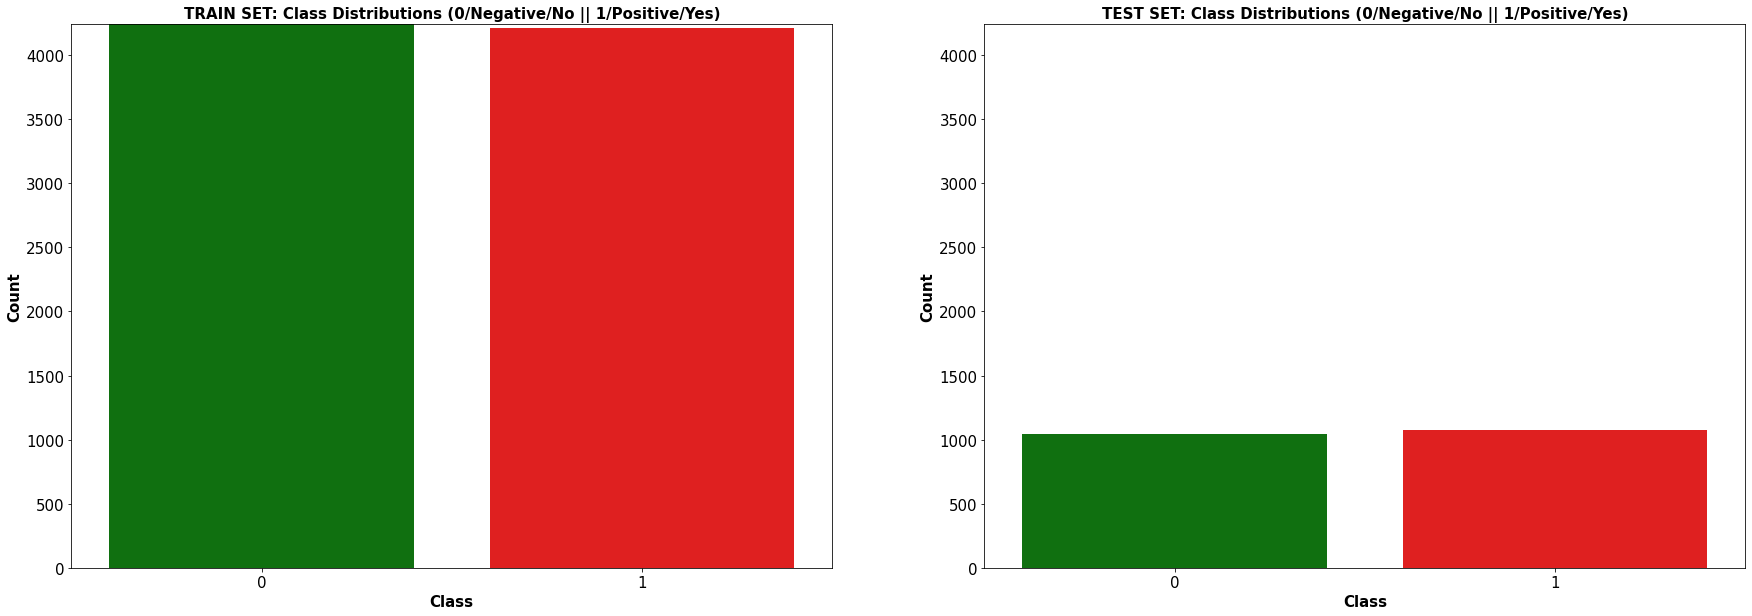

In [322]:
# Plotting the sets

plot_height = (len(df_balance_pso[df_balance_pso.New_Class == 0]) * 0.8) + 10

fig, ax = plt.subplots(1, 2, figsize=(30, 10))
plt.subplot(1, 2, 1)
colors = ["green", "red"]
df_train = pd.DataFrame(y_train.value_counts())
ax = sns.countplot(y_train, data=df_train, palette=colors)
ax.set_ylim(0, plot_height)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.xlabel('Class', fontweight='bold', fontsize=15)
plt.ylabel('Count', fontweight='bold', fontsize=15)
plt.title('TRAIN SET: Class Distributions (0/Negative/No || 1/Positive/Yes)', fontweight='bold', fontsize=15)

plt.subplot(1, 2, 2)
colors = ["green", "red"]
df_train = pd.DataFrame(y_test.value_counts())
ax = sns.countplot(y_test, data=df_train, palette=colors)
ax.set_ylim(0, plot_height)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.xlabel('Class', fontweight='bold', fontsize=15)
plt.ylabel('Count', fontweight='bold', fontsize=15)
plt.title('TEST SET: Class Distributions (0/Negative/No || 1/Positive/Yes)', fontweight='bold', fontsize=15)

print("After", program_name, ":")
print("X_train:")
print('Negative', round(y_train.value_counts()[0]/len(y_train) * 100,2), '% of the dataset:', y_train.value_counts()[0])
print('Positive', round(y_train.value_counts()[1]/len(y_train) * 100,2), '% of the dataset:', y_train.value_counts()[1])
print("")
print("X_test:")
print('Negative', round(y_test.value_counts()[0]/len(y_test) * 100,2), '% of the dataset:', y_test.value_counts()[0])
print('Positive', round(y_test.value_counts()[1]/len(y_test) * 100,2), '% of the dataset:', y_test.value_counts()[1])
print("")

plt.show()

In [323]:
# Classification with PSO Balanced Dataset

classifiers = [MLPClassifier(), SVC(probability=True), XGBClassifier(), RandomForestClassifier(), LogisticRegression(max_iter=5000)]
balanced_result_table_test = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
balanced_result_table_test_f1 = pd.DataFrame(columns=['Classifiers', 'Accuracy','Sensitivity', 'Specificity', 'Precision', 'F1Score', 'AUC', 'AveragePrecisionRecall'])

for cls in classifiers:
    model = cls.fit(X_train, y_train)

    # TEST set
    yproba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    balanced_result_table_test = balanced_result_table_test.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
    print("=====================================================================")
    print("Classifier = ", cls)
    print("TEST SET")
    y_pred = cls.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred, pos_label=1, average='macro')
    average_precision = average_precision_score(y_test, y_pred, average='weighted')
    ##print("Accuracy : ", accuracy)
    ##print("F1 Score : ", f1score)
    ##print("AUC : ", auc)
    ##print("Average Precision Recall: ", average_precision)
    print("")
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    
    
    precision, recall, fscore, support = score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    recall = np.round(recall, 4)
    precision = np.round(precision, 4)
    fscore = np.round(fscore, 4)
    ##print('Accuracy: {}'.format(np.round(accuracy * 100, 2)))
    ##print('Sensitivity: {}'.format(np.round(recall * 100, 2)))
    ##print('Specificity: {}'.format(np.round(specificity * 100, 2)))
    ##print('Precision: {}'.format(np.round(precision * 100, 2)))
    ##print('F1Score: {}'.format(np.round(fscore * 100, 2)))
    balanced_result_table_test_f1 = balanced_result_table_test_f1.append({'Classifiers':str(cls)[0:3],
                                        'Accuracy':accuracy, 
                                        'Sensitivity':recall, 
                                        'Specificity':specificity, 
                                        'Precision':precision, 
                                        'F1Score':fscore,
                                        'AUC':auc, 
                                        'AveragePrecisionRecall':average_precision}, ignore_index=True)
    
# Set name of the classifiers as index labels
pd.options.display.max_columns = None
pd.set_option('display.expand_frame_repr', False)
balanced_result_table_test.set_index('classifiers', inplace=True)

Classifier =  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
TEST SET
[[969  72]
 [167 908]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1041
           1       0.93      0.84      0.88      1075

    accuracy                           0.89      2116
   macro avg       0.89      0.89      0.89      2116
weighted avg       0.89      0.89      0.89      2116


Classifier =  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decisio

In [324]:
# Results performance bar plot (PSO Balanced Dataset)

color = ('#FF4136', '#2ECC40', '#FF851B', '#0074D9')
#FF851B orange, #FF4136 red, #0074D9, blue, #2ECC40 green)

# Function plotting the results performance
def plot_result(result_table, result_set, dataset):
  result_table = result_table.set_index('Classifiers')
  result_table = result_table.round(4)
  print(program_name, result_set, 'set result:\n', result_table)
  #ax = result_table.plot.bar(color=color, figsize=(20, 9))
  #plt.xticks(rotation=0)
  #plt.ylabel("Performance", fontsize=15)
  #plt.xlabel("Classifiers", fontsize=15)
  #plt.ylim(0, 1.03)
  #plt.grid(True)
  #plt.legend(loc=2)
  #plt.title('{} Dataset - {} Set ({}) performance'.format(dataset, result_set, dataset_set), fontweight='bold', fontsize=15)
  
  i = 0
  label = np.round(result_table.Accuracy.values, 2)
  for p in ax.patches:
      ax.annotate(str(round(p.get_height(),2 )), (p.get_x() * 1.005, p.get_height() * 1.005), fontweight='bold', fontsize=12)
      i = i+1

  plt.show()            
  print("")

plot_result(balanced_result_table_test_f1, "Test", "PSO Balanced")

PSO Test set result:
              Accuracy       Sensitivity  Specificity         Precision           F1Score     AUC  AveragePrecisionRecall
Classifiers                                                                                                             
MLP            0.8871  [0.9308, 0.8447]       0.9308   [0.853, 0.9265]  [0.8902, 0.8837]  0.9579                  0.8615
SVC            0.8809   [0.975, 0.7898]       0.9750  [0.8179, 0.9703]  [0.8896, 0.8708]  0.9515                  0.8731
XGB            0.9277  [0.9549, 0.9014]       0.9549  [0.9036, 0.9537]  [0.9285, 0.9268]  0.9832                  0.9098
Ran            0.9315  [0.9414, 0.9219]       0.9414   [0.9211, 0.942]  [0.9311, 0.9318]  0.9845                  0.9081
Log            0.8875  [0.9107, 0.8651]       0.9107  [0.8673, 0.9091]  [0.8885, 0.8866]  0.9532                  0.8550



In [325]:
# # Plotting ROC/AUC

# # Function plotting AUC
# def plot_roc(result_table, result_set, dataset):
#   fig1 = plt.figure(1, figsize=(16,8))
#   for i in result_table.index:
#     plt.plot(result_table.loc[i]['fpr'], 
#              result_table.loc[i]['tpr'], 
#              label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
#   plt.plot([0,1], [0,1], color='orange', linestyle='--')
#   plt.xticks(np.arange(0.0, 1.1, step=0.1))
#   plt.xlabel("False Positive Rate", fontsize=15)
#   plt.yticks(np.arange(0.0, 1.1, step=0.1))
#   plt.ylabel("True Positive Rate", fontsize=15)
#   plt.title('{} Dataset - {} Set: ROC Chart'.format(dataset, result_set), fontweight='bold', fontsize=15)
#   plt.legend(prop={'size':13}, loc='lower right')

#   plt.show()
#   #fig.savefig('multiple_roc_curve.png')

# plot_roc(balanced_result_table_test, "Test", "PSO Balanced")

# Random Undersampling (RUS)

In [326]:
# RUS then Separating train and test set

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import AllKNN
from collections import Counter

rus = RandomUnderSampler(random_state=47)
#rus = NearMiss(version=1, n_neighbors=3) # NearMiss(version=2, n_neighbors=3)
#rus = CondensedNearestNeighbour(n_neighbors=1)
#rus = TomekLinks()
#rus = EditedNearestNeighbours(n_neighbors=3)
#rus = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
#rus = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
#rus = ClusterCentroids(random_state=0)
#rus = AllKNN()

X = df.drop('New_Class', axis = 1) 
y = df['New_Class'] 

# RUS
start_time = datetime.now() 
X_rus, y_rus = rus.fit_resample(X, y)
print("")
print('Resampled dataset shape %s' % Counter(y_rus))

print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

X_rus = pd.DataFrame(X_rus)
y_rus = pd.Series(y_rus)

X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=3)


Resampled dataset shape Counter({0: 5289, 1: 5289})
Time elapsed (hh:mm:ss.ms) 0:00:00.018384


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After RUS:
X_train:
Negative 49.95 % of the dataset: 4227
Positive 50.05 % of the dataset: 4235

X_test:
Negative 50.19 % of the dataset: 1062
Positive 49.81 % of the dataset: 1054



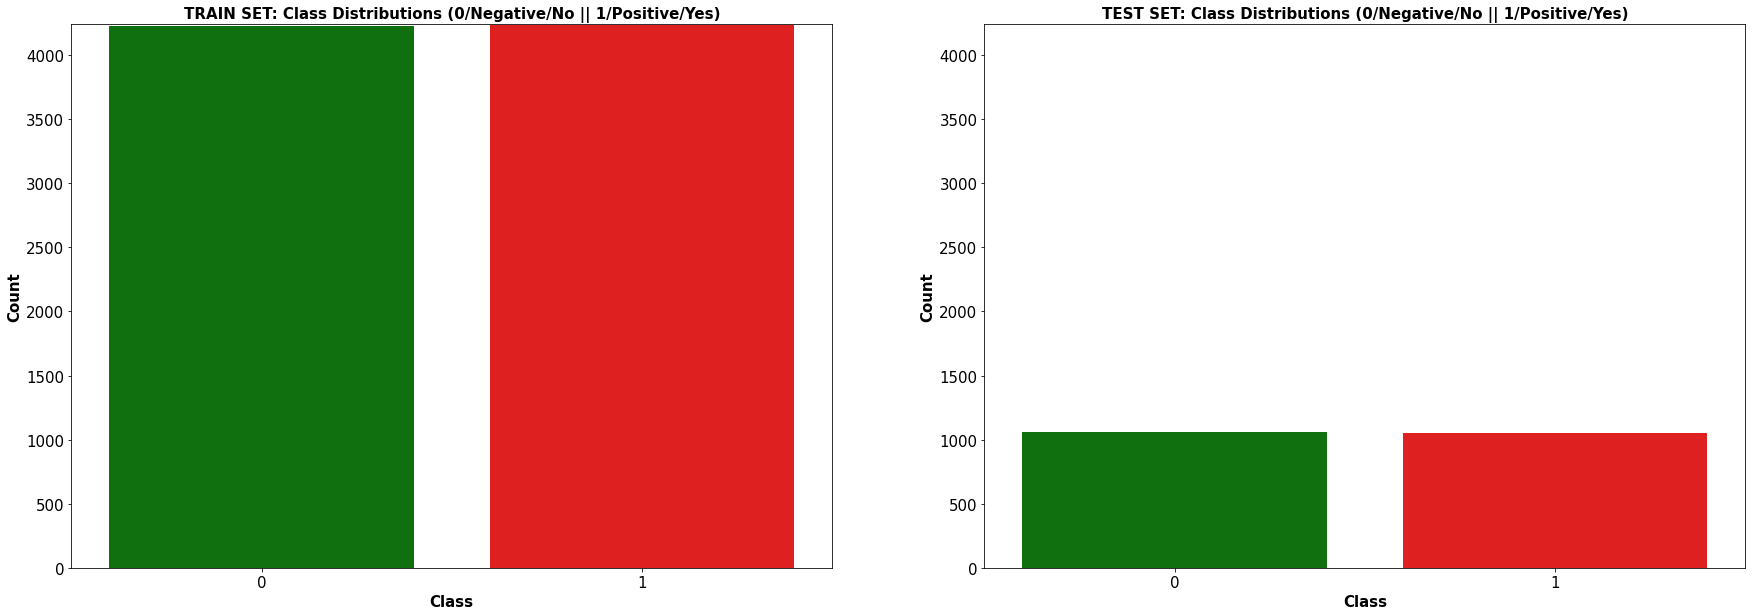

In [327]:
# Plotting the sets

plot_height = (len(df_balance_pso[df_balance_pso.New_Class == 0]) * 0.8) + 10

fig, ax = plt.subplots(1, 2, figsize=(30, 10))
plt.subplot(1, 2, 1)
colors = ["green", "red"]
df_train = pd.DataFrame(y_train.value_counts())
ax = sns.countplot(y_train, data=df_train, palette=colors)
ax.set_ylim(0, plot_height)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.xlabel('Class', fontweight='bold', fontsize=15)
plt.ylabel('Count', fontweight='bold', fontsize=15)
plt.title('TRAIN SET: Class Distributions (0/Negative/No || 1/Positive/Yes)', fontweight='bold', fontsize=15)

plt.subplot(1, 2, 2)
colors = ["green", "red"]
df_train = pd.DataFrame(y_test.value_counts())
ax = sns.countplot(y_test, data=df_train, palette=colors)
ax.set_ylim(0, plot_height)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.xlabel('Class', fontweight='bold', fontsize=15)
plt.ylabel('Count', fontweight='bold', fontsize=15)
plt.title('TEST SET: Class Distributions (0/Negative/No || 1/Positive/Yes)', fontweight='bold', fontsize=15)

print("After RUS:")
print("X_train:")
print('Negative', round(y_train.value_counts()[0]/len(y_train) * 100,2), '% of the dataset:', y_train.value_counts()[0])
print('Positive', round(y_train.value_counts()[1]/len(y_train) * 100,2), '% of the dataset:', y_train.value_counts()[1])
print("")
print("X_test:")
print('Negative', round(y_test.value_counts()[0]/len(y_test) * 100,2), '% of the dataset:', y_test.value_counts()[0])
print('Positive', round(y_test.value_counts()[1]/len(y_test) * 100,2), '% of the dataset:', y_test.value_counts()[1])
print("")

plt.show()

In [328]:
# Classification with RUS Balanced Dataset

classifiers = [MLPClassifier(), SVC(probability=True), XGBClassifier(), RandomForestClassifier(), LogisticRegression(max_iter=5000)]
rus_result_table_test = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
rus_result_table_test_f1 = pd.DataFrame(columns=['Classifiers', 'Accuracy','Sensitivity', 'Specificity', 'Precision', 'F1Score', 'AUC', 'AveragePrecisionRecall'])

for cls in classifiers:
    model = cls.fit(X_train, y_train)

    # TEST set
    yproba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    rus_result_table_test = rus_result_table_test.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
    print("=====================================================================")
    print("Classifier = ", cls)
    print("TEST SET")
    y_pred = cls.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred, pos_label=1, average='macro')
    average_precision = average_precision_score(y_test, y_pred, average='weighted')
    ##print("Accuracy : ", accuracy)
    ##print("F1 Score : ", f1score)
    ##print("AUC : ", auc)
    ##print("Average Precision Recall: ", average_precision)
    print("")
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    
    
    precision, recall, fscore, support = score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    recall = np.round(recall, 4)
    precision = np.round(precision, 4)
    fscore = np.round(fscore, 4)
    ##print('Accuracy: {}'.format(np.round(accuracy * 100, 2)))
    ##print('Sensitivity: {}'.format(np.round(recall * 100, 2)))
    ##print('Specificity: {}'.format(np.round(specificity * 100, 2)))
    ##print('Precision: {}'.format(np.round(precision * 100, 2)))
    ##print('F1Score: {}'.format(np.round(fscore * 100, 2)))
    rus_result_table_test_f1 = rus_result_table_test_f1.append({'Classifiers':str(cls)[0:3],
                                        'Accuracy':accuracy, 
                                        'Sensitivity':recall, 
                                        'Specificity':specificity, 
                                        'Precision':precision, 
                                        'F1Score':fscore,
                                        'AUC':auc, 
                                        'AveragePrecisionRecall':average_precision}, ignore_index=True)
    
# Set name of the classifiers as index labels
pd.options.display.max_columns = None
pd.set_option('display.expand_frame_repr', False)
rus_result_table_test.set_index('classifiers', inplace=True)

Classifier =  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
TEST SET
[[900 162]
 [363 691]]
              precision    recall  f1-score   support

           0       0.71      0.85      0.77      1062
           1       0.81      0.66      0.72      1054

    accuracy                           0.75      2116
   macro avg       0.76      0.75      0.75      2116
weighted avg       0.76      0.75      0.75      2116


Classifier =  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decisio

In [329]:
# Results performance bar plot (RUS Balanced Dataset)

color = ('#FF4136', '#2ECC40', '#FF851B', '#0074D9')
#FF851B orange, #FF4136 red, #0074D9, blue, #2ECC40 green)

# Function plotting the results performance
def plot_result(result_table, result_set, dataset):
  result_table = result_table.set_index('Classifiers')
  result_table = result_table.round(4)
  print("RUS", result_set, 'set result:\n', result_table)
  #ax = result_table.plot.bar(color=color, figsize=(20, 9))
  #plt.xticks(rotation=0)
  #plt.ylabel("Performance", fontsize=15)
  #plt.xlabel("Classifiers", fontsize=15)
  #plt.ylim(0, 1.03)
  #plt.grid(True)
  #plt.legend(loc=2)
  #plt.title('{} Dataset - {} Set ({}) performance'.format(dataset, result_set, dataset_set), fontweight='bold', fontsize=15)
  
  i = 0
  label = np.round(result_table.Accuracy.values, 2)
  for p in ax.patches:
      ax.annotate(str(round(p.get_height(),2 )), (p.get_x() * 1.005, p.get_height() * 1.005), fontweight='bold', fontsize=12)
      i = i+1

  plt.show()            
  print("")

plot_result(rus_result_table_test_f1, "Test", "RUS Balanced")

RUS Test set result:
              Accuracy       Sensitivity  Specificity         Precision           F1Score     AUC  AveragePrecisionRecall
Classifiers                                                                                                             
MLP            0.7519  [0.8475, 0.6556]       0.8475  [0.7126, 0.8101]  [0.7742, 0.7247]  0.8482                  0.7026
SVC            0.7453  [0.7834, 0.7068]       0.7834  [0.7292, 0.7641]  [0.7553, 0.7344]  0.8297                  0.6861
XGB            0.8431  [0.8258, 0.8605]       0.8258  [0.8564, 0.8306]  [0.8408, 0.8453]  0.9175                  0.7842
Ran            0.8450  [0.8277, 0.8624]       0.8277  [0.8584, 0.8324]  [0.8428, 0.8472]  0.9150                  0.7864
Log            0.8072   [0.8183, 0.796]       0.8183   [0.8017, 0.813]  [0.8099, 0.8044]  0.8763                  0.7488



In [330]:
# # Plotting ROC/AUC

# # Function plotting AUC
# def plot_roc(result_table, result_set, dataset):
#   fig1 = plt.figure(1, figsize=(16,8))
#   for i in result_table.index:
#     plt.plot(result_table.loc[i]['fpr'], 
#              result_table.loc[i]['tpr'], 
#              label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
#   plt.plot([0,1], [0,1], color='orange', linestyle='--')
#   plt.xticks(np.arange(0.0, 1.1, step=0.1))
#   plt.xlabel("False Positive Rate", fontsize=15)
#   plt.yticks(np.arange(0.0, 1.1, step=0.1))
#   plt.ylabel("True Positive Rate", fontsize=15)
#   plt.title('{} Dataset - {} Set: ROC Chart'.format(dataset, result_set), fontweight='bold', fontsize=15)
#   plt.legend(prop={'size':13}, loc='lower right')

#   plt.show()
#   #fig.savefig('multiple_roc_curve.png')

# plot_roc(rus_result_table_test, "Test", "RUS Balanced")

# Imbalanced vs PSO vs RUS

In [331]:
# Results performance bar plot (Imbalanced vs PSO vs RUS)

color = ('#FF4136', '#2ECC40', '#FF851B', '#0074D9')
#FF851B orange, #FF4136 red, #0074D9, blue, #2ECC40 green)

# Function plotting the results performance
def plot_result_compare(result_table, result_set, dataset):
  result_table = result_table.set_index('Classifiers')
  #print(program_name, result_set, 'set result:\n', result_table)
  ax = result_table.plot.bar(color=color, figsize=(15, 7))
  plt.xticks(rotation=0)
  plt.ylabel("Performance", fontsize=15)
  plt.xlabel("Classifiers", fontsize=15)
  plt.ylim(0, 1.03)
  plt.grid(True)
  plt.legend(loc=2)
  plt.title('{} Dataset - {} Set ({}) performance'.format(dataset, result_set, dataset_set), fontweight='bold', fontsize=15)
  
  i = 0
  label = np.round(result_table.Accuracy.values, 2)
  for p in ax.patches:
      ax.annotate(str(round(p.get_height(),2 )), (p.get_x() * 1.005, p.get_height() * 1.005), fontweight='bold', fontsize=12)
      i = i+1

  plt.show()            
  print("")

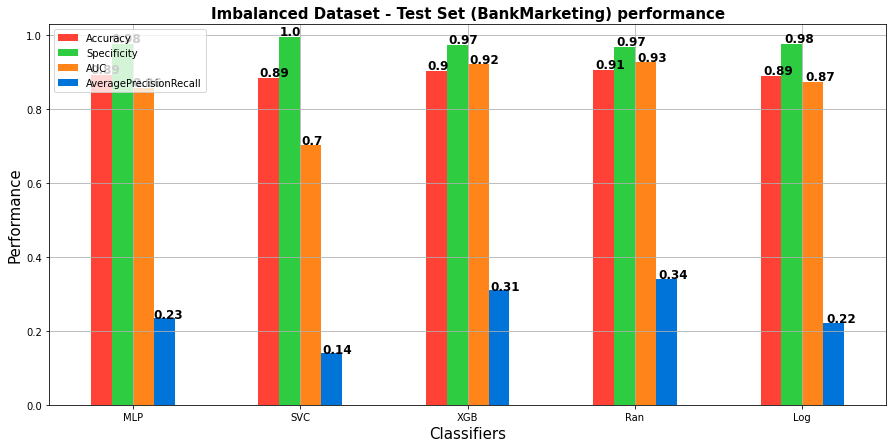

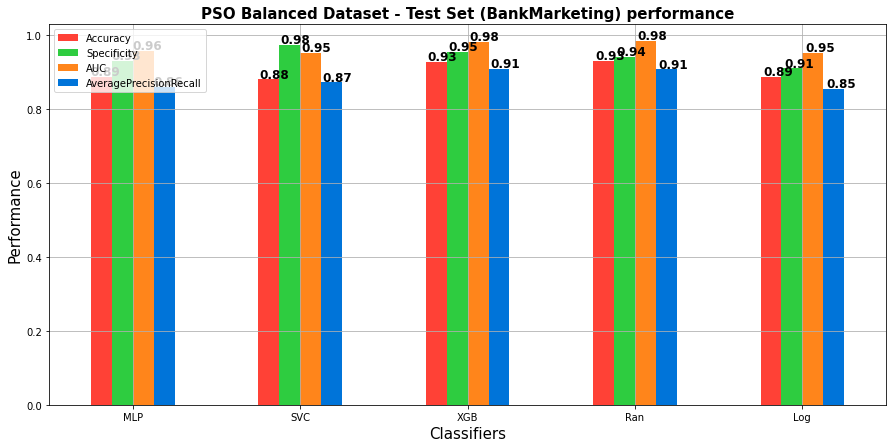

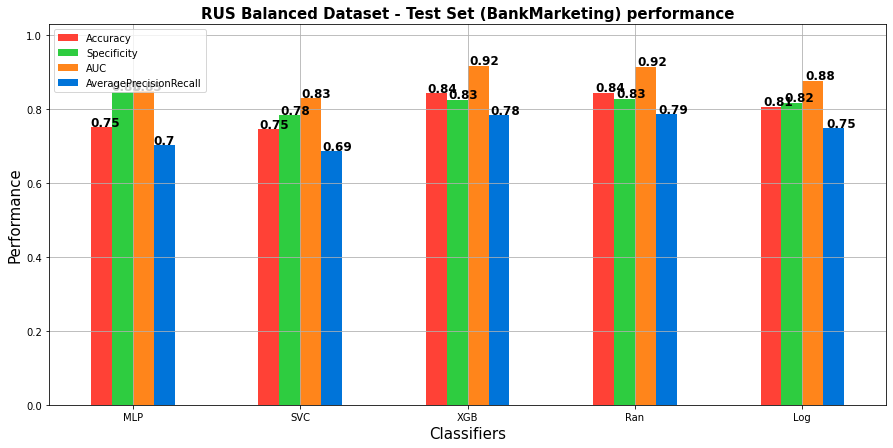

In [332]:
# Bar Chart Comparison (Imbalanced vs PSO vs RUS)

plot_result_compare(imbalanced_result_table_test_f1, "Test", "Imbalanced")
plot_result_compare(balanced_result_table_test_f1, "Test", "PSO Balanced")
plot_result_compare(rus_result_table_test_f1, "Test", "RUS Balanced")

In [333]:
# Plotting ROC/AUC

# Function plotting AUC
def plot_roc_compare(result_table, result_set, dataset):
  fig1 = plt.figure(1, figsize=(15, 7))
  for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
  plt.plot([0,1], [0,1], color='orange', linestyle='--')
  plt.xticks(np.arange(0.0, 1.1, step=0.1))
  plt.xlabel("False Positive Rate", fontsize=15)
  plt.yticks(np.arange(0.0, 1.1, step=0.1))
  plt.ylabel("True Positive Rate", fontsize=15)
  plt.title('{} Dataset - {} Set: ROC Chart'.format(dataset, result_set), fontweight='bold', fontsize=15)
  plt.legend(prop={'size':13}, loc='lower right')

  plt.show()
  #fig.savefig('multiple_roc_curve.png')

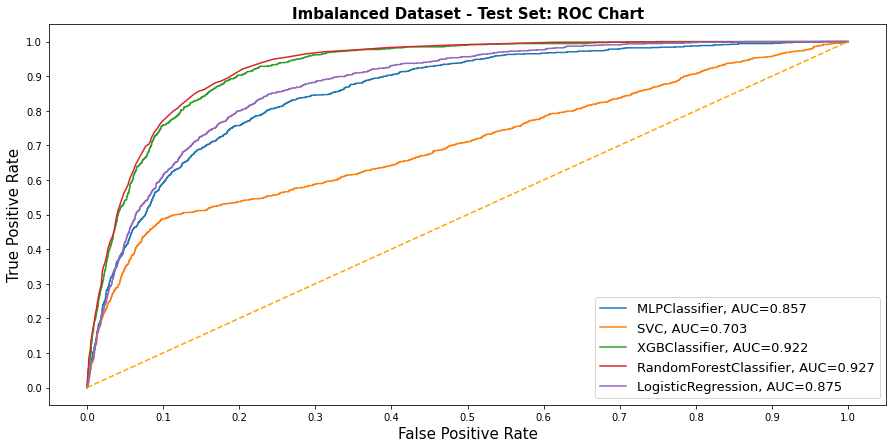

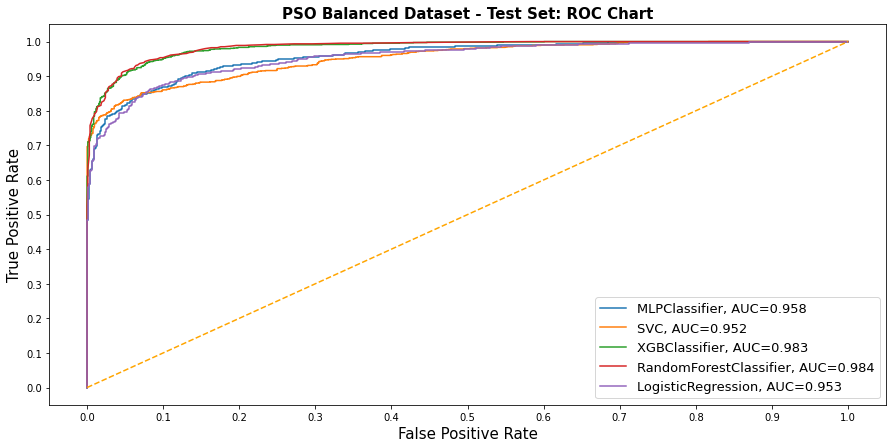

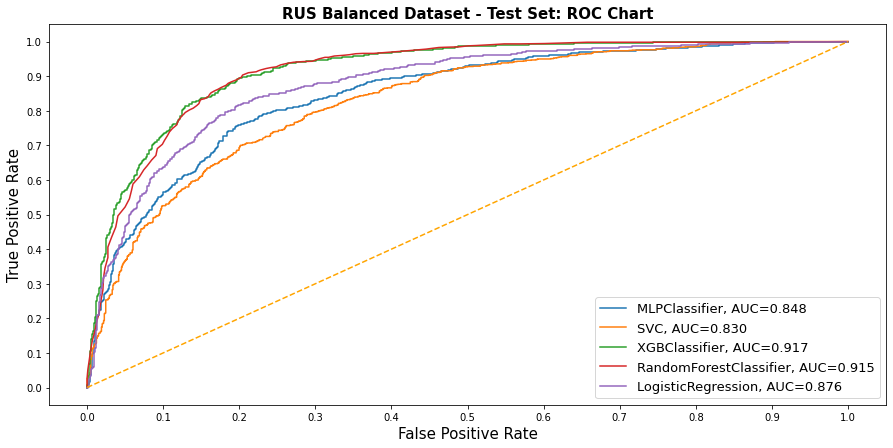

In [334]:
# ROC Comparison (Imbalanced vs PSO vs RUS)

plot_roc_compare(imbalanced_result_table_test, "Test", "Imbalanced")
plot_roc_compare(balanced_result_table_test, "Test", "PSO Balanced")
plot_roc_compare(rus_result_table_test, "Test", "RUS Balanced")

In [335]:
print('TOTAL elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - first_start_time))
print(mytime)
print("ALL DONE")

TOTAL elapsed (hh:mm:ss.ms) 0:23:40.952756
2020-08-03 02:41:35.716753+08:00
ALL DONE
